# K Means Clustering

### Step 1. Import Libraries

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import scale

### Step 2. Load data

In [2]:
contents = pd.read_csv('newhackneydata.csv')
contents.head

<bound method NDFrame.head of            Wards in Hackney  Average Age Average income
0                Brownswood         33.2     £48,860.00
1                  Cazenove         29.2     £46,380.00
2                   Chatham         32.1     £39,570.00
3                  Clissold         33.6     £56,050.00
4                   Dalston         32.8     £46,500.00
5               De Beauvoir         33.2     £47,560.00
6           Hackney Central         33.7     £42,840.00
7             Hackney Downs         33.1     £43,360.00
8                Haggerston         31.2     £43,830.00
9                    Hoxton         32.2     £42,490.00
10              King's Park         32.8     £38,930.00
11                Leabridge         32.5     £42,650.00
12                 Lordship         31.4     £48,700.00
13                New River         30.4     £43,230.00
14             Queensbridge         33.9     £44,620.00
15              Springfield         29.2     £40,810.00
16  Stoke Newingto

### Step 3. Transform the data for python

In [3]:
contents.columns = ['wards', 'age', 'income']
contents[['income']]=contents[['income']].replace('[\£,]','', regex=True).astype(float)
print(contents[['income']])
contents.head

     income
0   48860.0
1   46380.0
2   39570.0
3   56050.0
4   46500.0
5   47560.0
6   42840.0
7   43360.0
8   43830.0
9   42490.0
10  38930.0
11  42650.0
12  48700.0
13  43230.0
14  44620.0
15  40810.0
16  51920.0
17  45410.0
18  40010.0


<bound method NDFrame.head of                       wards   age   income
0                Brownswood  33.2  48860.0
1                  Cazenove  29.2  46380.0
2                   Chatham  32.1  39570.0
3                  Clissold  33.6  56050.0
4                   Dalston  32.8  46500.0
5               De Beauvoir  33.2  47560.0
6           Hackney Central  33.7  42840.0
7             Hackney Downs  33.1  43360.0
8                Haggerston  31.2  43830.0
9                    Hoxton  32.2  42490.0
10              King's Park  32.8  38930.0
11                Leabridge  32.5  42650.0
12                 Lordship  31.4  48700.0
13                New River  30.4  43230.0
14             Queensbridge  33.9  44620.0
15              Springfield  29.2  40810.0
16  Stoke Newington Central  33.9  51920.0
17                 Victoria  33.2  45410.0
18                     Wick  32.6  40010.0>

### Step 4. Visualise the data

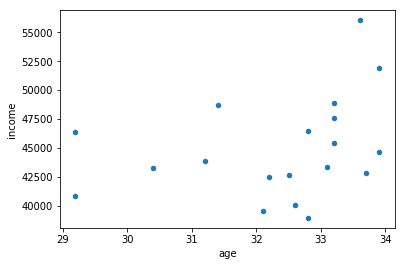

In [4]:
contents.plot.scatter(x ='age', y ='income')

### Step 5. Applying K Means Clustering

In [33]:
data = []
for index, row in contents.iterrows():
    age = row['age']
    income = row['income']
    data.append( [float(age), float(income)] )
    
model = KMeans(n_clusters=5)
model.fit(scale(data))

contents['cluster'] = model.labels_.astype(float)

### Step 6. Visualise the Clusters

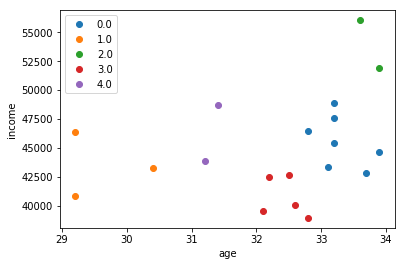

In [34]:
groups = contents.groupby('cluster')

# Plot the clusters
fig, ax = plt.subplots()
for name, group in groups:
    ax.plot(group.age,group.income, marker='o', linestyle='', label=name)
    
plt.xlabel('age')
plt.ylabel('income')
ax.legend()

### Step 7. Use Elbow test to decide number of clusters

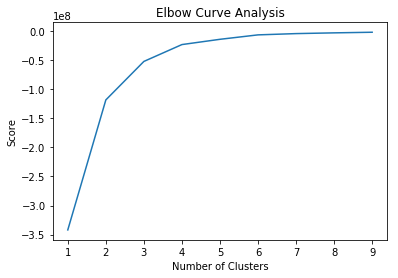

In [32]:
x = contents[['age']]
y = contents[['income']]

num_clusters = [1,2,3,4,5,6,7,8,9]
kmeans = [ KMeans(n_clusters=i) for i in num_clusters ]
score = [ kmeans[i-1].fit(y).score(y)for i in num_clusters ]

plt.plot(num_clusters, score)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve Analysis')
plt.show()